In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-08-30 08:42:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 172.253.115.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   116MB/s    in 0.6s    

2024-08-30 08:42:24 (116 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


Assign each of these directories to a variable so you can use it later.

In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

filenames look like in the cats and dogs train directories (file naming conventions are the same in the validation directory)

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.353.jpg', 'cat.55.jpg', 'cat.838.jpg', 'cat.640.jpg', 'cat.678.jpg', 'cat.286.jpg', 'cat.271.jpg', 'cat.899.jpg', 'cat.692.jpg', 'cat.450.jpg']
['dog.509.jpg', 'dog.755.jpg', 'dog.137.jpg', 'dog.588.jpg', 'dog.444.jpg', 'dog.690.jpg', 'dog.867.jpg', 'dog.692.jpg', 'dog.785.jpg', 'dog.751.jpg']


find out the total number of cat and dog images in the train and validation directories:

For both cats and dogs, have 1,000 training images and 500 validation images.
Identifyng the

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Now, display a batch of 8 cat and 8 dog pictures. You can re-run the cell to see a fresh batch each time:

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters  graph; output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

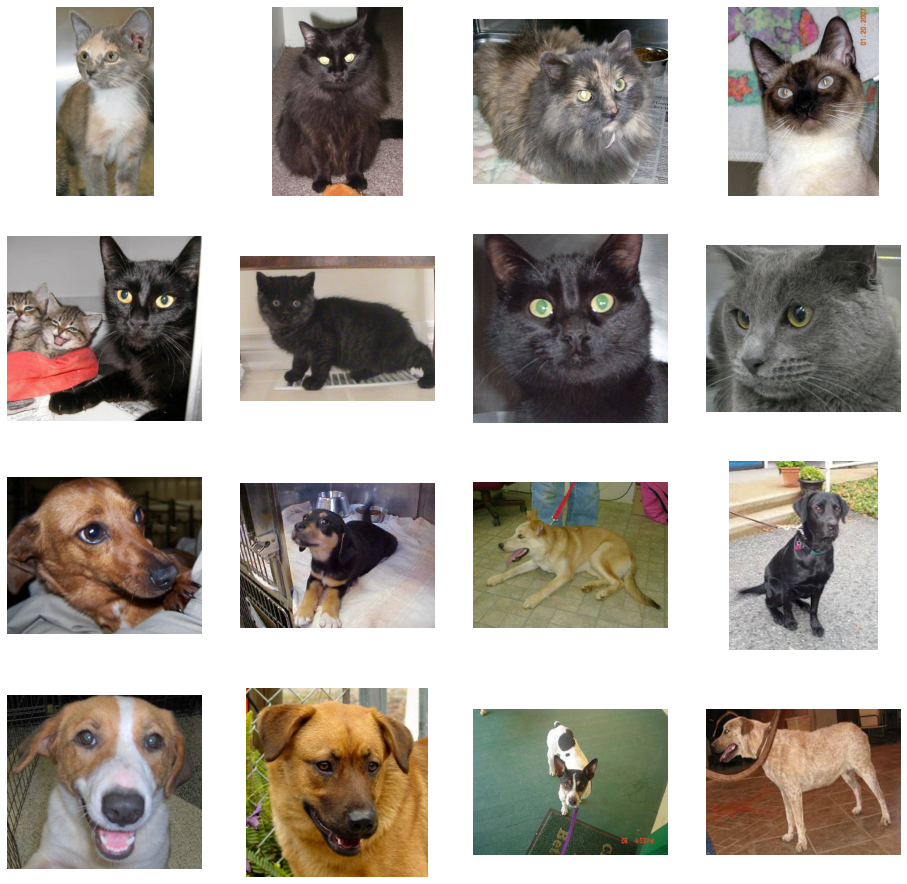

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
#change here the values

pic_index+=8
#index of images that contain ofthe data set

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

To train a neural network to handle the images,need them to be in a uniform size. choose 150x150 pixels for this, and see the code that preprocesses the images to that shape shortly.

define the model by importing Tensorflow and using the Keras API.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])



A convolutional neural network (CNN) typically consists of a series of Conv2D and MaxPooling2D layers, which operate on the input data to extract features and reduce the dimensionality. The output of these layers is a multi-dimensional array with dimensions that depend on the specific architecture of the CNN. In order to feed this output into a dense neural network, which consists of fully-connected layers, it is necessary to flatten the multi-dimensional output into a one-dimensional array. The Flatten layer performs this operation by simply unraveling the multi-dimensional input into a one-dimensional array

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

I defined a Sequential layer as before, adding some convolutional layers first. Note the input_shape parameter this time. Here is where i put the 150x150 size and 3 for the color depth because you have colored images.  then add a couple of convolutional layers and flatten the final result to feed into the densely connected layers.

Note that because facing a two-class classification problem, i.e. a binary classification problem, i will end the network with a sigmoid activation. The output of the network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#optimization algorithm that is often used to train deep learning models

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )
#The verbose argument specifies how much output the fit method should produce.


Epoch 1/15
100/100 - 75s - loss: 0.7969 - accuracy: 0.5205 - val_loss: 0.6895 - val_accuracy: 0.5020 - 75s/epoch - 755ms/step
Epoch 2/15
100/100 - 74s - loss: 0.6788 - accuracy: 0.5795 - val_loss: 0.6465 - val_accuracy: 0.6220 - 74s/epoch - 740ms/step
Epoch 3/15
100/100 - 75s - loss: 0.6184 - accuracy: 0.6725 - val_loss: 1.0338 - val_accuracy: 0.5410 - 75s/epoch - 748ms/step
Epoch 4/15
100/100 - 76s - loss: 0.5523 - accuracy: 0.7205 - val_loss: 0.5716 - val_accuracy: 0.7130 - 76s/epoch - 759ms/step
Epoch 5/15
100/100 - 75s - loss: 0.4991 - accuracy: 0.7530 - val_loss: 0.5623 - val_accuracy: 0.7100 - 75s/epoch - 753ms/step
Epoch 6/15
100/100 - 74s - loss: 0.4415 - accuracy: 0.8010 - val_loss: 0.5658 - val_accuracy: 0.7200 - 74s/epoch - 744ms/step
Epoch 7/15
100/100 - 74s - loss: 0.3577 - accuracy: 0.8370 - val_loss: 0.6282 - val_accuracy: 0.7160 - 74s/epoch - 736ms/step
Epoch 8/15
100/100 - 74s - loss: 0.2785 - accuracy: 0.8780 - val_loss: 0.6698 - val_accuracy: 0.7200 - 74s/epoch - 739

Model Predication Start

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving download.jpeg to download.jpeg
1/1 [==============================] - 0s 154ms/step
[1.9431054e-06]
download.jpeg is a cat


================================================================================To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.==================

1/1 [==============================] - 0s 106ms/step


<ipython-input-15-9f8b645292ed>:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


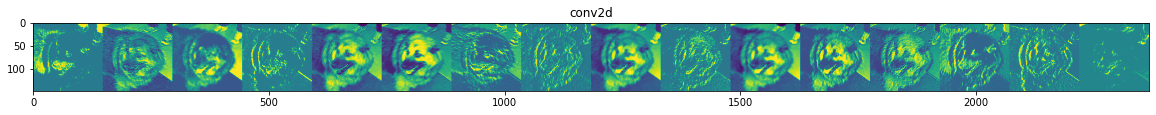

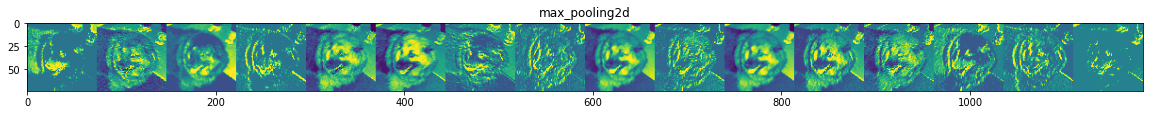

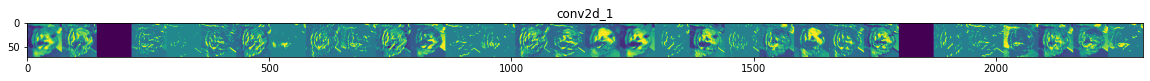

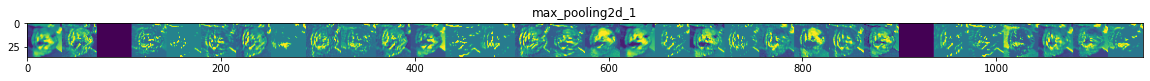

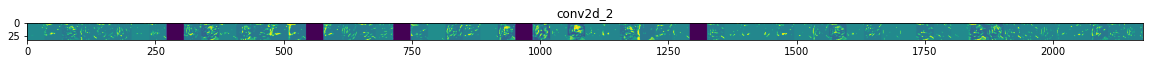

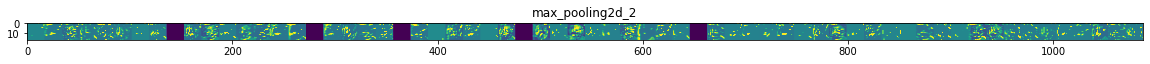

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:


    # Just do this for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

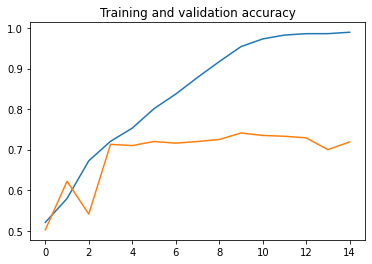

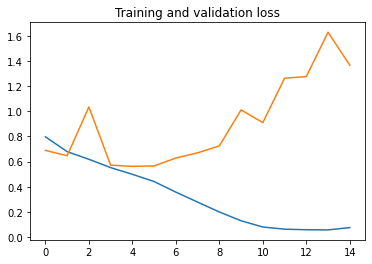

In [ ]:
acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Conclusion :

training accuracy (in blue) gets close to 100% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

Since i have a relatively small number of training examples (2000), overfitting should be the number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions.

To mitigate that : regularization, adding more data, or using techniques like dropout



In [ ]:
# Save the model
tf.keras.models.save_model(model, 'know_your_pet.h5')
# Load the saved model
model1 = tf.keras.models.load_model('know_your_pet.h5')